In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_pd = pd.DataFrame(iris.data , columns=columns)
iris_pd['species'] = iris.target
iris_pd.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


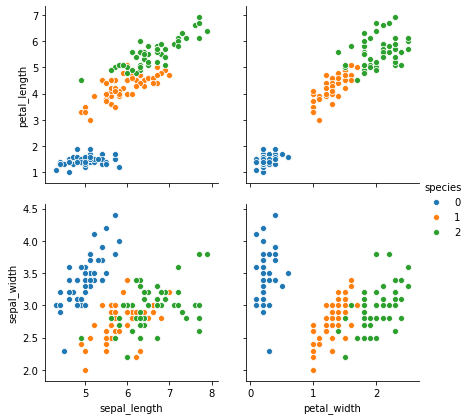

In [2]:
import seaborn as sns

sns.pairplot(iris_pd, hue='species', height=3,
             x_vars=['sepal_length', 'petal_width'], 
             y_vars=['petal_length', 'sepal_width'])

In [3]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [0]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [5]:
iris_pca, pca = get_pca_data(iris_ss, n_components=2)
iris_pca.shape

(150, 2)

In [6]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [7]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [8]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
iris_ss[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [10]:
iris_ss[0].shape

(4,)

In [11]:
iris_ss[0].reshape(1, -1).shape

(1, 4)

In [12]:
pca.transform(iris_ss[0].reshape(1, -1))

array([[-2.26470281,  0.4800266 ]])

In [0]:
def get_pd_from_pca(pca_data, cols=['pca_component_1','pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [14]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


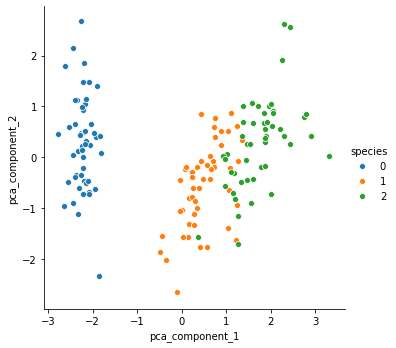

In [15]:
sns.pairplot(iris_pd_pca, hue='species', height=5,
             x_vars=['pca_component_1'], y_vars=['pca_component_2'])

In [16]:
import numpy as np

def print_variance_ratio(pca):
    print('variance_ratio: ', pca. explained_variance_ratio_)
    print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance_ratio:  [0.72962445 0.22850762]
sum of variance_ratio:  0.9581320720000165


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score :  0.96


In [27]:
pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]

rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


In [28]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial'+\
                                '/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [29]:
wine_y = wine['color']
wine_X = wine.drop(['color'], axis=1)
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [31]:
wine_ss.shape

(6497, 12)

In [32]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [33]:
print_variance_ratio(pca)

variance_ratio:  [0.25346226 0.22082117]
sum of variance_ratio:  0.47428342743236185


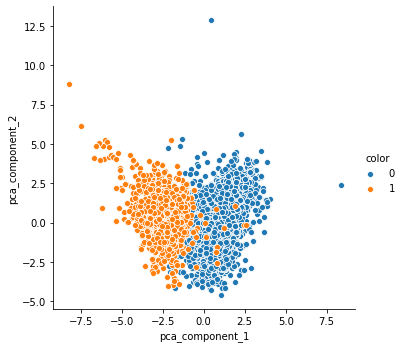

In [34]:
pca_columns = ['pca_component_1','pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(pca_wine_pd, hue='color', height=5,
             x_vars=['pca_component_1'], y_vars=['pca_component_2'])

In [35]:
rf_scores(wine_ss, wine_y)

Score :  0.9933816537972016


In [36]:
pca_X = pca_wine_pd[['pca_component_1', 'pca_component_2']]
rf_scores(pca_X, wine_y)

Score :  0.9812204607021219


In [37]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

cols = ['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

variance_ratio:  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio:  0.6110756621838697
Score :  0.9830692215627433


In [40]:
pca_X = pca_wine_pd[['pca_1', 'pca_2', 'pca_3']]
rf_scores(pca_X, wine_y)

Score :  0.9830692215627433


In [38]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

,pca_1,pca_2,pca_3,color
0,-3.348438,0.568926,-2.727386,1
1,-3.228595,1.197335,-1.998904,1
2,-3.237468,0.952580,-1.746578,1
3,-1.672561,1.600583,2.856552,1
4,-3.348438,0.568926,-2.727386,1


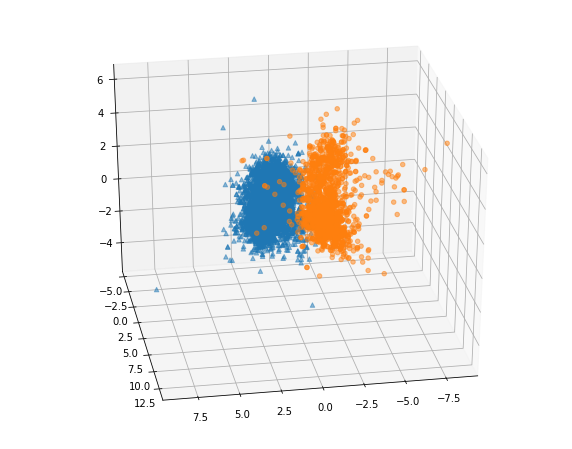

In [42]:
from mpl_toolkits.mplot3d import Axes3D

markers=['^', 'o']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') 

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_3']

    ax.scatter(x_axis_data, y_axis_data, z_axis_data, 
               s= 20, alpha=0.5, marker=marker)

ax.view_init(30, 80)
plt.show()